# Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Inspiration
Identify fraudulent credit card transactions.

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# loading the dataset to a Pandas DataFrame
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# ```Exploratory Data Analysis (EDA)```

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Outliers treatment
We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

### Distribution of classes with 'Time' feature

In [7]:
# Creating fraud dataframe
data_fraud = data[data['Class'] == 1]

# Creating non fraud dataframe
data_non_fraud = data[data['Class'] == 0]

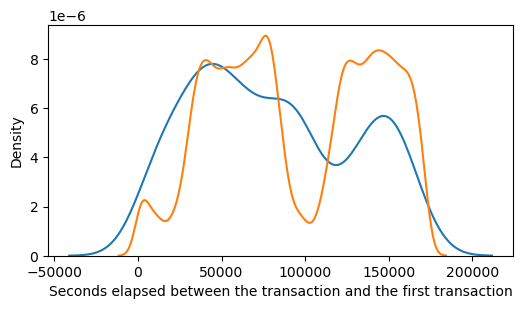

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot
plt.figure(figsize=(6, 3))
ax = sns.distplot(data_fraud['Time'], label='fraudt', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non fraud', hist=False)
ax.set(xlabel='Seconds elapsed between the transaction and the first transaction')
plt.show()


We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can ```drop``` the ```Time``` column.

### Dropping 'Time' feature

In [9]:
data = data.drop(['Time'], axis = 1)

In [10]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Distribution of classes with 'Amount' feature

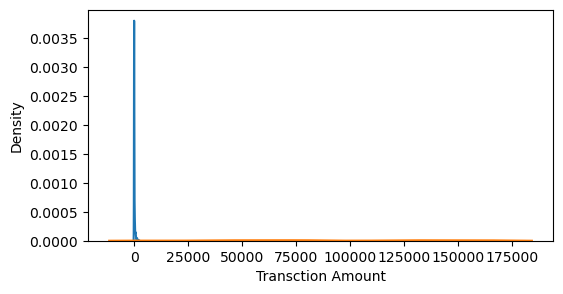

In [11]:
# Distribution plot
plt.figure(figsize=(6,3))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

We can see that the ```fraud transctions are mostly densed in the lower range of amount```, whereas the ```non-fraud transctions are spreaded throughout low to high range of amount```.

In [12]:
data.isnull().values.any()  # Checking null values

False

In [13]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
# Checking duplicate values
data.duplicated().any()

True

In [15]:
data = data.drop_duplicates()

In [16]:
data.shape

(275663, 30)

In [17]:
print('duplicate values dropped: ', 284807 - 275663)

duplicate values dropped:  9144


### Scaling 'Amount' feature using StandardScaler

We need to scale only the ```Amount``` column as all other columns are already scaled by the PCA transformation.

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [19]:
data['Amount'] = ss.fit_transform(pd.DataFrame(data['Amount']))

In [20]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.233169,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.347092,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.137702,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.130015,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.081308,0


# ```W/O Handling imbalance```

In [21]:
# distribution of legit transactions & fraudulent transactions
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

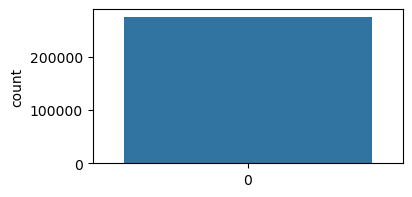

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 2))  # Adjust the width and height as needed
sns.countplot(data['Class'])
# Show the plot
plt.show()

### Store Feature Matrix In X And Response (Target) In Vector y

In [23]:
X = data.drop('Class', axis = 1)
y = data['Class']

### Splitting The Dataset Into The Training Set And Test Set

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred1 = lr.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred1)

0.9992200678359603

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_test,y_pred1)

0.8870967741935484

In [28]:
recall_score(y_test,y_pred1)

0.6043956043956044

In [29]:
f1_score(y_test,y_pred1)

0.718954248366013

Just looking at the accuracy score is not enough. We also need to look at other scores like precision, recall, and f1. Sometimes, the accuracy score might seem really good, but it's because the data is not balanced, meaning one group is much bigger than the other. So, we need to check all these scores to get a better picture.
The same idea holds true for other models such as Decision Trees and Support Vector Classifiers (SVC). 

# ```Handling Imbalance```

### Undersampling

Undersampling, in simple terms, is a technique used in machine learning when we have more data for one category (class) than the other. It involves reducing the size of the larger group to make the dataset more balanced.

This Dataset is highly imbalance:   
0 - Normal Transaction    
1 - Fraudulent transaction

In [30]:
# Get the Fraud and the normal dataset 

fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

In [31]:
print(fraud.shape, normal.shape)

(473, 30) (275190, 30)


In [32]:
# randomly selecting 473 samples from normal transcations

normal_sample = normal.sample(n=473)  

In [33]:
normal_sample.shape

(473, 30)

In [34]:
new_data = pd.concat([normal_sample, fraud], ignore_index=True)

new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [35]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.789607,0.750965,1.376839,0.044582,0.060510,-0.985231,0.663914,-0.195428,-0.270332,-0.230547,...,0.157706,0.390566,-0.093510,0.406802,-0.164699,0.338743,-0.188131,0.156169,-0.302505,0
1,1.877032,0.077305,-1.906442,1.032296,1.585811,1.305245,0.301270,0.222646,0.085105,0.050895,...,0.155120,0.821513,0.135494,-0.663923,0.216145,-0.394524,0.053299,-0.069646,-0.337969,0
2,-0.634779,1.143026,-0.407584,-0.292874,0.881355,-1.426634,1.129679,-0.404573,0.601754,-0.008144,...,0.134665,0.976244,-0.292376,-0.110108,-0.399533,-0.152627,0.559070,0.218511,-0.267317,0
3,1.217784,0.624554,-0.475952,1.162594,0.254266,-0.741952,0.163282,-0.044571,-0.241306,-0.495456,...,-0.044538,-0.117768,-0.170430,-0.151346,0.686241,-0.322241,0.027260,0.042712,-0.353766,0
4,0.947628,-0.146369,0.027690,1.173722,-0.092331,-0.066087,0.239221,0.046938,-0.075828,0.029446,...,0.104568,0.193139,-0.222035,0.038556,0.685169,-0.274401,-0.000822,0.017894,0.085626,0


In [36]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred1 = lr.predict(X_test)

print('Logistic Regression (after Undersampling):')
print('\nAccuracy_score: ', accuracy_score(y_test,y_pred1))
print('Precision_score: ', precision_score(y_test,y_pred1))
print('Recall_score: ', recall_score(y_test,y_pred1))
print('f1_score: ', f1_score(y_test,y_pred1))

Logistic Regression (after Undersampling):

Accuracy_score:  0.9473684210526315
Precision_score:  0.9893617021276596
Recall_score:  0.9117647058823529
f1_score:  0.9489795918367346


### Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred2 = dt.predict(X_test)

print('Decision Tree Classifier (after Undersampling):')
print('\nAccuracy_score: ', accuracy_score(y_test,y_pred2))
print('Precision_score: ', precision_score(y_test,y_pred2))
print('Recall_score: ', recall_score(y_test,y_pred2))
print('f1_score: ', f1_score(y_test,y_pred2))

Decision Tree Classifier (after Undersampling):

Accuracy_score:  0.9263157894736842
Precision_score:  0.9313725490196079
Recall_score:  0.9313725490196079
f1_score:  0.9313725490196079


### Support Vector Classifiers (SVC)

In [39]:
from sklearn.svm import SVC

# Train SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predictions
y_pred3 = svc_model.predict(X_test)

print('Support Vector Classifier (after Undersampling):')
print('\nAccuracy_score: ', accuracy_score(y_test,y_pred3))
print('Precision_score: ', precision_score(y_test,y_pred3))
print('Recall_score: ', recall_score(y_test,y_pred3))
print('f1_score: ', f1_score(y_test,y_pred3))

Support Vector Classifier (after Undersampling):

Accuracy_score:  0.9421052631578948
Precision_score:  1.0
Recall_score:  0.8921568627450981
f1_score:  0.9430051813471504


In [40]:
undersample_final_data = pd.DataFrame({'Models':['LogisticRegression','DecisionTreeClassifier','SVC'],
              "Accuracy":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [41]:
undersample_final_data

,Models,Accuracy
0,LogisticRegression,94.736842
1,DecisionTreeClassifier,92.631579
2,SVC,94.210526


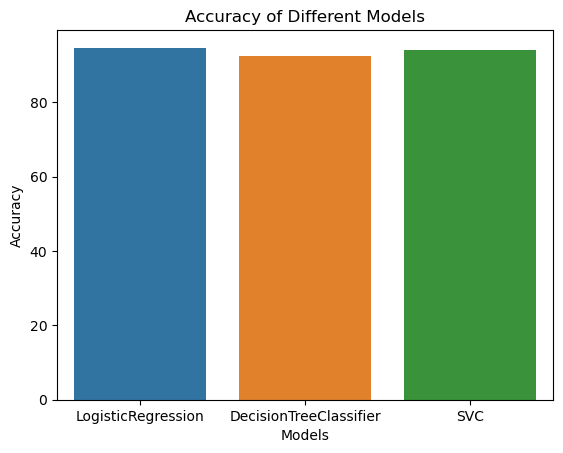

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x='Models', y='Accuracy', data=undersample_final_data)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

With such a large dataset, undersampling might lead to a significant reduction in the available data, potentially losing valuable information. Oversampling techniques, such as SMOTE, can generate synthetic samples for the minority class, thereby increasing the representation of the minority class without discarding any data from the majority class.

Therefore, in this scenario, we decide to explore oversampling techniques to balance the class distribution and improve the model's performance.

# Oversampling

Oversampling involves increasing the number of instances in the minority class to balance the class distribution. This is often done by replicating existing minority class instances or generating synthetic data points using techniques like SMOTE (Synthetic Minority Over-sampling Technique). Oversampling helps to provide more information to the model about the minority class, potentially improving its ability to generalize.

In [43]:
X1 = data.drop('Class', axis=1)
y1 = data['Class']

In [44]:
X1.shape

(275663, 29)

In [45]:
y1.shape

(275663,)

In [46]:
from imblearn.over_sampling import SMOTE

X1_res, y1_res = SMOTE().fit_resample(X1, y1)
y1_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

### SMOTE 
stands for "Synthetic Minority Over-sampling Technique." It's a technique used in machine learning to handle imbalanced datasets, where one class (the minority class) has significantly fewer examples than the other (the majority class).

Imagine you have a dataset of cats and dogs, but you have many more pictures of cats than dogs. In this case, dogs are the minority class. SMOTE helps balance the dataset by creating synthetic (artificial) examples of the minority class.

Here's how it works:

For each example in the minority class, SMOTE selects some of its nearest neighbors.
It then creates new examples by combining the features of the selected example with the features of its neighbors.
These synthetic examples are added to the dataset, making the minority class more represented.
In our cat and dog example, SMOTE would generate new dog images based on the existing dog images, helping the machine learning model to better learn and predict the minority class.

So, in simple terms, SMOTE helps make sure that the machine learning model doesn't become biased towards the majority class by creating more examples of the minority class.

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

X1_train, X1_test, y1_train, y1_test = train_test_split(X1_res, y1_res, test_size=0.2, random_state=42)

lr1 = LogisticRegression()
lr1.fit(X1_train, y1_train)

y1_pred1 = lr1.predict(X1_test)

print('Logistic Regression (after Oversampling):')
print('\nAccuracy_score: ', accuracy_score(y1_test,y1_pred1))
print('Precision_score: ', precision_score(y1_test,y1_pred1))
print('Recall_score: ', recall_score(y1_test,y1_pred1))
print('f1_score: ', f1_score(y1_test,y1_pred1))

Logistic Regression (after Oversampling):

Accuracy_score:  0.944501980449871
Precision_score:  0.9729724500851261
Recall_score:  0.9143319455302438
f1_score:  0.9427411871666775


### Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier


dt1 = DecisionTreeClassifier()
dt1.fit(X1_train, y1_train)

y1_pred2 = dt1.predict(X1_test)

print('Decision Tree Classifier (after Oversampling):')
print('\nAccuracy_score: ', accuracy_score(y1_test,y1_pred2))
print('Precision_score: ', precision_score(y1_test,y1_pred2))
print('Recall_score: ', recall_score(y1_test,y1_pred2))
print('f1_score: ', f1_score(y1_test,y1_pred2))

Decision Tree Classifier (after Oversampling):

Accuracy_score:  0.9981103964533595
Precision_score:  0.9973857633026524
Recall_score:  0.9988364271039761
f1_score:  0.9981105681013025


### Support Vector Classifiers (SVC)

In [49]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


svc_model = LinearSVC()
svc_model.fit(X1_train, y1_train)

y1_pred3 = svc_model.predict(X1_test)

print('SVC Results:')
print('Accuracy_score:', accuracy_score(y1_test, y1_pred3))
print('Precision_score:', precision_score(y1_test, y1_pred3))
print('Recall_score:', recall_score(y1_test, y1_pred3))
print('F1_score:', f1_score(y1_test, y1_pred3))


SVC Results:
Accuracy_score: 0.9409589737999201
Precision_score: 0.9773264052905054
Recall_score: 0.9027871207025071
F1_score: 0.9385791647371255


In [50]:
oversample_final_data = pd.DataFrame({'Models':['LogisticRegression','DecisionTreeClassifier','SVC'],
              "Accuracy":[accuracy_score(y1_test,y1_pred1)*100,
                     accuracy_score(y1_test,y1_pred2)*100,
                     accuracy_score(y1_test,y1_pred3)*100
                    ]})

In [51]:
oversample_final_data

,Models,Accuracy
0,LogisticRegression,94.450198
1,DecisionTreeClassifier,99.811040
2,SVC,94.095897


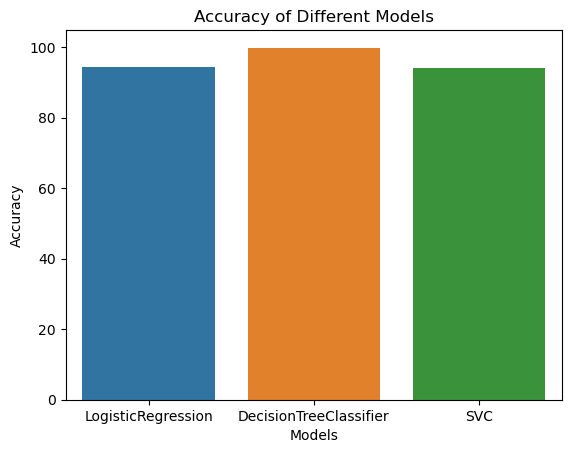

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x = 'Models', y = 'Accuracy', data = oversample_final_data)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

# ```Save The Model```

### DecisionTreeClassifier

In [53]:
dt1 = DecisionTreeClassifier()
dt1.fit(X1_res, y1_res)

DecisionTreeClassifier()

In [60]:
import joblib

joblib.dump(dt1, "dt_credit_card_model")

['D:\\pythonAF\\dt_credit_card_model']

In [55]:
model = joblib.load(r"credit_card_model")

In [73]:
#pred = model.predict([[-2.312226542, 1.951992011, -1.609850732, 3.997905588, -0.522187865, -1.426545319, -2.537387306, 1.391657248, -2.770089277, -2.772272145, 3.202033207, -2.899907388, -0.595221881, -4.289253782, 0.38972412, -1.14074718, -2.830055675, -0.016822468, 0.416955705, 0.126910559, 0.517232371, -0.035049369, -0.465211076, 0.320198199, 0.044519167, 0.177839798, 0.261145003, -0.143275875, -0.353229393]])
pred = model.predict([[0.1,0,1,1,1,0,0.4,0.7,1,1,1,1,1,1,1,0.9,0.6,0.8,1,1,1,0.4,0.2,1,1,1,1,1,1]])

In [74]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


### Logistic Regression

In [58]:
lr2 = LogisticRegression()
lr2.fit(X1_res, y1_res)

LogisticRegression()

In [61]:
import joblib

joblib.dump(lr2, "lr_credit_card_model")

['D:\\pythonAF\\lr_credit_card_model']

In [62]:
model_lr = joblib.load(r"lr_credit_card_model")

In [63]:
pred = model.predict([[-2.312226542, 1.951992011, -1.609850732, 3.997905588, -0.522187865, -1.426545319, -2.537387306, 1.391657248, -2.770089277, -2.772272145, 3.202033207, -2.899907388, -0.595221881, -4.289253782, 0.38972412, -1.14074718, -2.830055675, -0.016822468, 0.416955705, 0.126910559, 0.517232371, -0.035049369, -0.465211076, 0.320198199, 0.044519167, 0.177839798, 0.261145003, -0.143275875, -0.353229393]])


In [68]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


# ```GUI```

In [ ]:
from tkinter import *
import joblib

def show_entry_fields():
    v1=float(e1.get())
    v2=float(e2.get())
    v3=float(e3.get())
    v4=float(e4.get())
    v5=float(e5.get())
    v6=float(e6.get())

    v7=float(e7.get())
    v8=float(e8.get())
    v9=float(e9.get())
    v10=float(e10.get())
    v11=float(e11.get())
    v12=float(e12.get())

    v13=float(e13.get())
    v14=float(e14.get())
    v15=float(e15.get())
    v16=float(e16.get())
    v17=float(e17.get())
    v18=float(e18.get())


    v19=float(e19.get())
    v20=float(e20.get())
    v21=float(e21.get())
    v22=float(e22.get())
    v23=float(e23.get())
    v24=float(e24.get())


    v25=float(e25.get())
    v26=float(e26.get())
    v27=float(e27.get())
    v28=float(e28.get())
    v29=float(e29.get())


    model = joblib.load('model_credit.pkl')
    y_pred = model.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]])
    list1=[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]

    result = []
    if y_pred ==0:

        result.append("Normal Transcation")
    else:

        result.append("Fraudulent Transcation")
    print("######################################")
    print("Credit Card Fraud Detection System", result)
    print("######################################")



    Label(master, text="Final Prediction from the model - credit card fraud detection").grid(row=31)
    Label(master, text=result).grid(row=32)



master = Tk()
master.title("Credit Card Fraud Detection System")


label = Label(master, text = "Credit Card Fraud Detection System"
                          , bg = "black", fg = "white",width = 30).grid(row=0,columnspan=2)


Label(master, text="Enter value of V1").grid(row=1)
Label(master, text="Enter value of V2").grid(row=2)
Label(master, text="Enter value of V3").grid(row=3)
Label(master, text="Enter value of V4").grid(row=4)
Label(master, text="Enter value of V5").grid(row=5)
Label(master, text="Enter value of V6").grid(row=6)

Label(master, text="Enter value of V7").grid(row=7)
Label(master, text="Enter value of V8").grid(row=8)
Label(master, text="Enter value of V9").grid(row=9)
Label(master, text="Enter value of V10").grid(row=10)
Label(master, text="Enter value of V11").grid(row=11)
Label(master, text="Enter value of V12").grid(row=12)

Label(master, text="Enter value of V13").grid(row=13)
Label(master, text="Enter value of V14").grid(row=14)
Label(master, text="Enter value of V15").grid(row=15)
Label(master, text="Enter value of V16").grid(row=16)
Label(master, text="Enter value of V17").grid(row=17)
Label(master, text="Enter value of V18").grid(row=18)

Label(master, text="Enter value of V19").grid(row=19)
Label(master, text="Enter value of V20").grid(row=20)
Label(master, text="Enter value of V21").grid(row=21)
Label(master, text="Enter value of V22").grid(row=22)
Label(master, text="Enter value of V23").grid(row=23)
Label(master, text="Enter value of V24").grid(row=24)

Label(master, text="Enter value of V25").grid(row=25)
Label(master, text="Enter value of V26").grid(row=26)
Label(master, text="Enter value of V27").grid(row=27)
Label(master, text="Enter value of V28").grid(row=28)
Label(master, text="Enter value of V29").grid(row=29)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)

e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18= Entry(master)

e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23= Entry(master)
e24 = Entry(master)


e25 = Entry(master)
e26= Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29= Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)


e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)
e16.grid(row=16, column=1)
e17.grid(row=17, column=1)
e18.grid(row=18, column=1)


e19.grid(row=19, column=1)
e20.grid(row=20, column=1)
e21.grid(row=21, column=1)
e22.grid(row=22, column=1)
e23.grid(row=23, column=1)
e24.grid(row=24, column=1)

e25.grid(row=25, column=1)
e26.grid(row=26, column=1)
e27.grid(row=27, column=1)
e28.grid(row=28, column=1)
e29.grid(row=29, column=1)
 
Button(master, text='Predict', command=show_entry_fields).grid(row=30, column=1, sticky=W, pady=4)

mainloop( )

### 1. Logistic Regression:

Accuracy: 94.49%

Precision: 97.31%
Recall: 91.51%
F1 Score: 94.32%

#### Explanation:

Accuracy: It measures the overall correctness of the model. In this case, 94.49% of the predictions were correct.

Precision: It is the ratio of correctly predicted positive observations to the total predicted positives. In this scenario, 97.31% of the predicted fraud cases were actually fraudulent.

Recall (Sensitivity): It is the ratio of correctly predicted positive observations to the all observations in actual class. In this case, 91.51% of the actual fraud cases were correctly predicted.

F1 Score: It is the weighted average of precision and recall. It considers both false positives and false negatives. A higher F1 score indicates a better balance between precision and recall.

### 2. Decision Tree Classifier:

Accuracy: 99.84%

Precision: 99.75%
Recall: 99.93%
F1 Score: 99.84%

#### Explanation:

Decision Tree Classifier achieved extremely high performance metrics.

Accuracy: The model correctly predicted 99.84% of the cases.

Precision: 99.75% of the predicted fraud cases were actually fraudulent.

Recall: 99.93% of the actual fraud cases were correctly predicted.

F1 Score: The high F1 score indicates a very well-balanced performance.

### 3. Support Vector Classifier (SVC):

Accuracy: 94.19%

Precision: 97.73%
Recall: 90.47%
F1 Score: 93.96%

#### Explanation:

Accuracy: 94.19% of the predictions were correct.

Precision: 97.73% of the predicted fraud cases were actually fraudulent.

Recall: 90.47% of the actual fraud cases were correctly predicted.

F1 Score: A good balance between precision and recall.

### Overall Comparison:

Decision Tree Classifier has the highest accuracy and F1 score among the three models.
Logistic Regression and SVC have similar performances, but Logistic Regression has slightly better recall, while SVC has slightly better precision.

### Note:
The choice of the best model depends on the specific requirements of our project. Consider factors such as the importance of precision vs. recall in the context of credit card fraud detection.